### 5. DROPPING CONSTANT FEATURES

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

#### LET'S APPLY THIS ON SMALL SAMPLE DATASET:

In [1]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})

In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


#### Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning

In [3]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [4]:
var_thres.get_support()

array([ True,  True, False, False])

In [5]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [6]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [7]:
for feature in constant_columns:
     print(feature)

C
D


In [8]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


#### NOW LET'S WORK ON SOME BIGGER DATASET:

In [40]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [41]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\WaferFaultDetection_new\Prediction_FileFromDB\InputFile.csv")

In [42]:
df.shape

(837, 591)

In [43]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [44]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [45]:
### Finding non constant features
sum(var_thres.get_support())

475

In [46]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))

116


In [47]:
for column in constant_columns:
    print(column)

Sensor - 6
Sensor - 14
Sensor - 43
Sensor - 50
Sensor - 53
Sensor - 70
Sensor - 98
Sensor - 142
Sensor - 150
Sensor - 179
Sensor - 180
Sensor - 187
Sensor - 190
Sensor - 191
Sensor - 192
Sensor - 193
Sensor - 194
Sensor - 195
Sensor - 227
Sensor - 230
Sensor - 231
Sensor - 232
Sensor - 233
Sensor - 234
Sensor - 235
Sensor - 236
Sensor - 237
Sensor - 238
Sensor - 241
Sensor - 242
Sensor - 243
Sensor - 244
Sensor - 257
Sensor - 258
Sensor - 259
Sensor - 260
Sensor - 261
Sensor - 262
Sensor - 263
Sensor - 264
Sensor - 265
Sensor - 266
Sensor - 267
Sensor - 277
Sensor - 285
Sensor - 314
Sensor - 315
Sensor - 316
Sensor - 323
Sensor - 326
Sensor - 327
Sensor - 328
Sensor - 329
Sensor - 330
Sensor - 331
Sensor - 365
Sensor - 370
Sensor - 371
Sensor - 372
Sensor - 373
Sensor - 374
Sensor - 375
Sensor - 376
Sensor - 379
Sensor - 380
Sensor - 381
Sensor - 382
Sensor - 395
Sensor - 396
Sensor - 397
Sensor - 398
Sensor - 399
Sensor - 400
Sensor - 401
Sensor - 402
Sensor - 403
Sensor - 404
Sensor 

In [48]:
df1 = df.drop(constant_columns,axis=1)

In [49]:
df1.shape

(837, 475)

### 6. INDEPTH CORRELATION TECHNIQUE

In [50]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [52]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
X = df.drop("MEDV",axis=1) 
y = df["MEDV"]

In [54]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

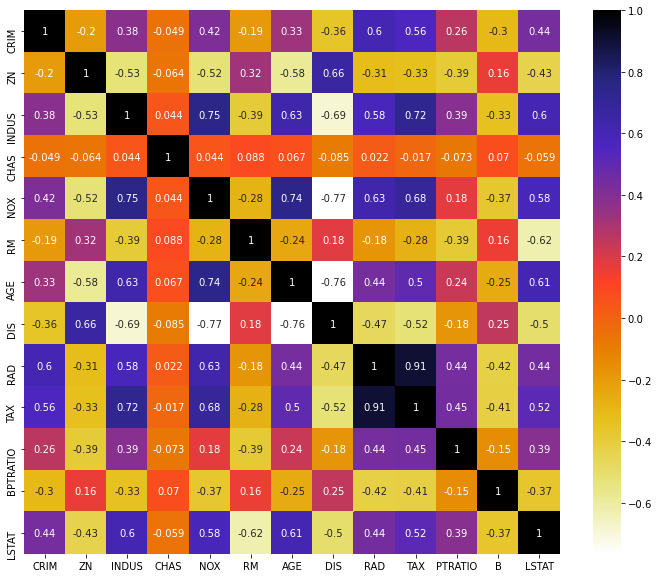

In [55]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [56]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [58]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [59]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


#### LET'S PERFORM THIS ON BIG DATASET:

In [60]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\WaferFaultDetection_new\Prediction_FileFromDB\InputFile.csv")

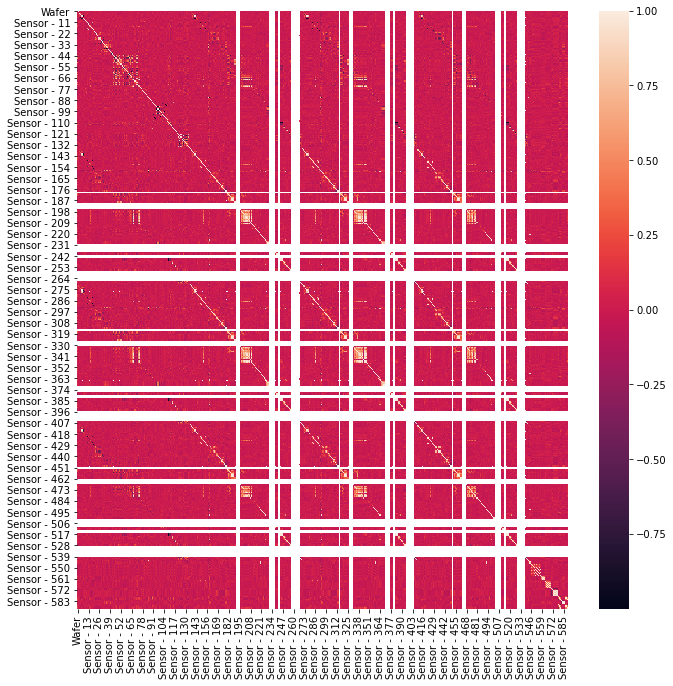

In [61]:
import seaborn as sns
#Using Pearson Correlation
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [62]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

224

In [63]:
df.drop(corr_features,axis=1)

,Wafer,Sensor - 1,Sensor - 2,Sensor - 3,Sensor - 4,Sensor - 5,Sensor - 6,Sensor - 7,Sensor - 9,Sensor - 10,...,Sensor - 566,Sensor - 571,Sensor - 572,Sensor - 573,Sensor - 574,Sensor - 579,Sensor - 580,Sensor - 582,Sensor - 583,Sensor - 584
0,1201,3045.98,2544.85,2253.3444,1873.8678,1.1691,100.0,94.9722,1.4752,0.0084,...,0.1399,524.4955,1.0912,11.1200,0.1474,NaN,NaN,NaN,0.4948,0.0123
1,1202,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.0,100.6222,1.4536,-0.0110,...,0.1731,530.7036,2.1207,8.4000,0.1986,NaN,NaN,NaN,0.5063,0.0113
2,1203,3071.18,2489.86,2195.3000,1151.8233,0.9220,100.0,103.5467,1.4826,0.0136,...,0.1707,524.4955,1.0912,11.1200,0.1474,NaN,NaN,NaN,0.5033,0.0112
3,1204,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.0,100.1367,1.4645,0.0001,...,0.0877,524.4955,1.0912,11.1200,0.1474,NaN,NaN,NaN,0.4954,0.0136
4,1205,3196.21,2413.39,2255.5222,1763.0739,1.2226,100.0,101.5878,1.4845,-0.0037,...,0.2352,495.3682,1.7909,415.0300,1.0166,0.0053,0.0188,353.8319,0.5058,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1396,3169.00,2265.60,2187.9889,1096.3790,0.9065,100.0,97.6567,1.4109,-0.0239,...,0.1115,569.9964,1.7961,441.9200,1.2113,0.0166,0.0122,73.6335,0.4912,0.0127
833,1397,2923.19,2516.40,2180.8889,1084.7221,0.9085,100.0,94.2467,1.3137,0.0345,...,0.0877,536.4482,1.4106,7.0500,0.1166,NaN,NaN,NaN,0.4939,0.0163
834,1398,3003.43,2448.34,2205.5000,1287.3538,2.3842,100.0,111.7644,1.4339,0.0020,...,0.1017,531.7464,2.2909,9.1299,0.2908,NaN,NaN,NaN,0.4966,0.0084
835,1399,2953.63,2500.05,2195.9778,1388.2869,1.5605,100.0,103.2400,1.5177,0.0183,...,0.0877,532.4700,2.1429,9.1400,0.1776,0.0178,0.0305,171.3183,0.5009,0.0135
